<a href="https://colab.research.google.com/github/TomChen1501/CST/blob/main/_notebooks/02-access-assess-geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 2

### [Radzim Sendyka](https://www.cst.cam.ac.uk/people/rs2071), University

of Cambridge

### [Christian Cabrera](https://www.cst.cam.ac.uk/people/chc79), University

of Cambridge

### [Carl Henrik Ek](http://carlhenrik.com), University of Cambridge

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2024-11-07

**Abstract**: In this lab session we look at working with geospatial
data, in conjunction with the house prices dataset you created in the
previous practicals.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

**The check Session for this Practical is 12th November 2024.**
Prerequisite: practical 1, and a working database with tables price paid
data (i.e., `pp_data`) and postcodes(i.e., `postcode_data`)

In this lab session we look at working with geospacial data, in
conjunction with the house prices dataset you created in the previous
practicals. The goal is to enrich the data from the first practical with
geographic data enabling better informed data analysis. Access to the
price paid database is needed to complete some of the below exercises.
You are asked to write reusable code that will help you in the
assessment.

## Accessing Open Street Maps

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/accessing-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/accessing-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

[Open Street Maps
(OSM)](https://www.openstreetmap.org/#map=6/54.91/-3.43) is an open
geographic database that can provide useful information about different
locations and places in the planet. In this example, we will download
data about the city of Kampala, Uganda. As always, we should start by
installing some Python packages.

In [87]:
%pip install osmnx

In [89]:
%pip install matplotlib==3.7.1

  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling matplotlib-3.9.2:
      Successfully uninstalled matplotlib-3.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.0 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

We will download data of Kamplala, Uganda, which has the following
latitude and longitude.

In [2]:
place_name = "Kampala, Uganda"

latitude = 0.347596 # Kampala latitude
longitude = 32.582520 # Kampala longitude

In [3]:
placestub = place_name.lower().replace(' ', '-').replace(',','')

We’ll create a bounding box which is 0.02 degrees wide, 1 degree is
around 111km ([circumference of the Earth is around 40,000
km](https://en.wikipedia.org/wiki/Metre) and 40,000/360=111km). Note:
will this approximation work well in all countries?

The approximation of 1 degree being around 111 km applies well nearthe equator, where one degree of ltitude and logitude both span about 111 km due to the Earth's nearly spherical shape. However, it becomes less accurate as you move towards the poles, particularly for longitude measurements, because meridians converage towards poles.

In [4]:
box_width = 0.02 # About 2.2 km
box_height = 0.02
north = latitude + box_height/2
south = latitude - box_width/2
west = longitude - box_width/2
east = longitude + box_width/2

Now we’ll download a set of points of interest from OpenStreetMap. We
can specify the points of interest we’re interested in by building a
small dictionary containing their labels as follows. A Point of Interest
is a location with certain importance in the geographic area. They can
vary from amenities to touristic places as you can see in the following.

In [5]:
# Retrieve POIs
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

We can use `osmnx` to download all such points of interest within a
given bounding box.

In [6]:
pois = ox.geometries_from_bbox(north, south, east, west, tags)

<ipython-input-6-46afd1d0c0ec>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_bbox(north, south, east, west, tags)


That operation can take some time, particularly as the bounding box
grows larger. Once it is complete we can check how many points of
interest we have found.

In [7]:
print("There are {number} points of interest surrounding {placename} latitude: {latitude}, longitude: {longitude}".format(number=len(pois), placename=place_name, latitude=latitude, longitude=longitude))

There are 880 points of interest surrounding Kampala, Uganda latitude: 0.347596, longitude: 32.58252


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


And then we can examine their contents in more detail.

In [8]:
pois

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

addr:housenumber  addr:street      amenity  cuisine  \
element_type osmid                                                            
node         599171967           Plot 21  Cooper Road   restaurant  mexican   
             599171968               NaN          NaN          NaN      NaN   
             599171969               NaN          NaN          NaN      NaN   
             599171971               NaN          NaN     pharmacy      NaN   
             601370312               NaN          NaN         fuel      NaN   
...                                  ...          ...          ...      ...   
way          1156972448              NaN          NaN  marketplace      NaN   
             1156972449              NaN          NaN  marketplace      NaN   
             1156972454              NaN          NaN  marketplace      NaN   
             1156972457              NaN          NaN  marketplace      NaN   
             1156972468              NaN          NaN  marketplace      NaN   

                                            name            phone  \
element_type osmid                                                  
node         599171967                  Que Pasa  +256 783 874469   
             599171968    Millennium Supermarket              NaN   
             599171969                  Checkers              NaN   
             599171971   Makro Pharmacy (U) Ltd.              NaN   
             601370312                     Kobil              NaN   
...                                          ...              ...   
way          1156972448                      NaN              NaN   
             1156972449                      NaN              NaN   
             1156972454                      NaN              NaN   
             1156972457                      NaN              NaN   
             1156972468                      NaN              NaN   

                                                                   website  \
element_type osmid                                                           
node         599171967             https://www.facebook.com/quepasakampala   
             599171968   http://www.millenniumsupermarket.com/profile.html   
             599171969                                                 NaN   
             599171971                                                 NaN   
             601370312                                                 NaN   
...                                                                    ...   
way          1156972448                                                NaN   
             1156972449                                                NaN   
             1156972454                                                NaN   
             1156972457                                                NaN   
             1156972468                                                NaN   

                                                                  geometry  \
element_type osmid                                                           
node         599171967                            POINT (32.58830 0.33888)   
             599171968                            POINT (32.58734 0.33821)   
             599171969                            POINT (32.58817 0.33865)   
             599171971                            POINT (32.58793 0.33845)   
             601370312                            POINT (32.58904 0.34189)   
...                                                                    ...   
way          1156972448  POLYGON ((32.59044 0.34826, 32.59079 0.34818, ...   
             1156972449  POLYGON ((32.59025 0.34807, 32.59037 0.34829, ...   
             1156972454  POLYGON ((32.59120 0.34825, 32.59121 0.34818, ...   
             1156972457  POLYGON ((32.59168 0.34846, 32.59168 0.34837, ...   
             1156972468  POLYGON ((32.59155 0.34854, 32.59155 0.34839, ...   

                                shop  brand  ... roof:shape communit

### We notice a few things:

1.  Points of interest do not have a consistent OpenStreetMap
    `element_type`, some are `node`, others are `relation` and we also
    have `way`. You can find out more about elements in OpenStreetMap on
    [this wiki page](https://wiki.openstreetmap.org/wiki/Elements). This
    will become important when tidying up the data for next stage
    processing.

2.  Many of the values are missing. In SQL we would express a missing
    value as `NULL`. But in `pandas` a missing value is expressed as
    not-a-number, `NaN`. This is quite a common standard, but it is not
    the only standard. Sometimes data is collected and coded with an
    “unreasonable” value for a missing value. For example, someone might
    set missing values for heights to -999. The concept is that this is
    an obviously void “height” and would trigger a human user to check
    whether it’s a missing value. Of course, this is obvious to humans,
    but not necessarily to a computer!

Nodes, ways and relations in OpenStreetMap all have different *keys*
associated with them. The data is not structured in standard database
columns. Different points of interest might have different keys present
or absent. We might be interested in the following keys.

In [9]:
keys = ["name",
        "addr:city",
        "addr:postcode",
        "amenity",
        "building",
        "building:name",
        "building:colour",
        "building:material",
        "historic",
        "memorial",
        "religion",
        "tourism",
        "emergency",
        "leisure",
        "shop"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


But our downloaded `gdf` may have fewer keys.

In [10]:
pois.columns.values

array(['addr:housenumber', 'addr:street', 'amenity', 'cuisine', 'name',
       'phone', 'website', 'geometry', 'shop', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'compressed_air', 'opening_hours', 'wheelchair',
       'access', 'capacity', 'parking', 'healthcare', 'addr:city',
       'addr:country', 'branch', 'note', 'designation', 'fee',
       'diet:halal', 'diet:kosher', 'payment:credit_cards',
       'payment:debit_cards', 'diet:vegan', 'diet:vegetarian',
       'internet_access', 'outdoor_seating', 'operator', 'alt_name',
       'drive_through', 'level', 'takeaway', 'email', 'tourism',
       'contact:email', 'contact:facebook', 'contact:instagram',
       'contact:phone', 'check_date:opening_hours', 'internet_access:fee',
       'operator:wikidata', 'atm', 'facebook', 'network', 'short_name',
       'check_date', 'fixme', 'addr:suburb', 'office', 'leisure', 'sport',
       'lit', 'supervised', 'surface', 'covered', 'addr:flats', 'beauty',
       'payment:cards', 'paymen

We can write a short piece of code to discover which keys are missing
drom the data frame’s columns.

In [11]:
for key in keys:
    if key not in pois.columns:
        print(key)

present_keys = [key for key in keys if key in pois.columns]
pois[present_keys]

building:name
building:colour
historic
memorial


name addr:city addr:postcode  \
element_type osmid                                                         
node         599171967                  Que Pasa       NaN           NaN   
             599171968    Millennium Supermarket       NaN           NaN   
             599171969                  Checkers       NaN           NaN   
             599171971   Makro Pharmacy (U) Ltd.       NaN           NaN   
             601370312                     Kobil       NaN           NaN   
...                                          ...       ...           ...   
way          1156972448                      NaN       NaN           NaN   
             1156972449                      NaN       NaN           NaN   
             1156972454                      NaN       NaN           NaN   
             1156972457                      NaN       NaN           NaN   
             1156972468                      NaN       NaN           NaN   

                             amenity building building:material religion  \
element_type osmid                                                         
node         599171967    restaurant      NaN               NaN      NaN   
             599171968           NaN      NaN               NaN      NaN   
             599171969           NaN      NaN               NaN      NaN   
             599171971      pharmacy      NaN               NaN      NaN   
             601370312          fuel      NaN               NaN      NaN   
...                              ...      ...               ...      ...   
way          1156972448  marketplace      NaN               NaN      NaN   
             1156972449  marketplace      NaN               NaN      NaN   
             1156972454  marketplace      NaN               NaN      NaN   
             1156972457  marketplace      NaN               NaN      NaN   
             1156972468  marketplace      NaN               NaN      NaN   

                        tourism emergency leisure         shop  
element_type osmid                                              
node         599171967      NaN       NaN     NaN          NaN  
             599171968      NaN       NaN     NaN  supermarket  
             599171969      NaN       NaN     NaN  supermarket  
             599171971      NaN       NaN     NaN          NaN  
             601370312      NaN       NaN     NaN          NaN  
...                         ...       ...     ...          ...  
way          1156972448     NaN       NaN     NaN          NaN  
             1156972449     NaN       NaN     NaN          NaN  
             1156972454     NaN       NaN     NaN          NaN  
             1156972457     NaN       NaN     NaN          NaN  
             1156972468     NaN       NaN     NaN          NaN  

[880 rows x 11 columns]

In [12]:
selected_rows = pois[pois.tourism.notnull()]
selected_rows[present_keys]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:city addr:postcode  \
element_type osmid                                                           
node         3032234586                    Fat Cat       NaN           NaN   
             4119308804                Green apple   Kampala           NaN   
             4942954054                Okrut Close       NaN           NaN   
             5678162422          Tagore Apartments       NaN           NaN   
             7743212629                        NaN       NaN           NaN   
             8445011017               Prisma Hotel       NaN           NaN   
             8456545033          Silverline Condos       NaN           NaN   
             8456545129            Kida Guesthouse       NaN           NaN   
             8481722617           Koda Guest House       NaN           NaN   
             8498971118         Mulago Guest House       NaN           NaN   
             8597526517           Papa Guest house       NaN           NaN   
             8686698118          Silent Corner inn       NaN           NaN   
             8686698119           Kerona Dam Hotel       NaN           NaN   
             8778105111                 Nyumba 591       NaN           NaN   
way          437577068   Hilton Garden Inn Kampala   Kampala           NaN   
             649469461    Ku spot inn accomodation       NaN           NaN   

                                    amenity building building:material  \
element_type osmid                                                       
node         3032234586                 NaN      NaN               NaN   
             4119308804  mobile_money_agent      NaN               NaN   
             4942954054                 NaN      NaN               NaN   
             5678162422                 NaN      NaN               NaN   
             7743212629                 NaN      NaN               NaN   
             8445011017                 NaN      NaN               NaN   
             8456545033                 NaN      NaN               NaN   
             8456545129                 NaN      NaN               NaN   
             8481722617                 NaN      NaN               NaN   
             8498971118                 NaN      NaN               NaN   
             8597526517                 NaN      NaN               NaN   
             8686698118                 NaN      NaN               NaN   
             8686698119                 NaN      NaN               NaN   
             8778105111                 NaN      NaN               NaN   
way          437577068                  NaN      yes               NaN   
             649469461                  NaN      yes               NaN   

                        religion      tourism emergency leisure shop  
element_type osmid                                                    
node         3032234586      NaN       hostel       NaN     NaN  NaN  
             4119308804      NaN  guest_house       NaN     NaN  NaN  
             4942954054      NaN  information       NaN     NaN  NaN  
             5678162422      NaN    apartment       NaN     NaN  NaN  
             7743212629      NaN  guest_house       NaN     NaN  NaN  
             8445011017      NaN        hotel       NaN     NaN  NaN  
             8456545033      NaN    apartment       NaN     NaN  NaN  
             8456545129      NaN  guest_house       NaN     NaN  NaN  
             8481722617      NaN  guest_house       NaN     NaN  NaN  
             8498971118      NaN  guest_house       NaN     NaN  NaN  
             8597526517      NaN  guest_house       NaN     NaN  NaN  
             8686698118      NaN  guest_house       NaN     NaN  NaN  
             8686698119      NaN        hotel       NaN     NaN  NaN  
             8778105111      NaN       hostel       NaN     NaN  NaN  
way          437577068       NaN        hotel       NaN     NaN  NaN  
             649469461       NaN  guest_house       NaN     NaN  NaN

This gives us the relevant points of interest (part of the map). If we’d
like to see the entire street network, we can download the entire graph
from the location.

In [13]:
graph = ox.graph_from_bbox(north, south, east, west)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-6b67372c95de>:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.graph_from_bbox(north, south, east, west)
<ipython-input-13-6b67372c95de>:1: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  graph = ox.graph_from_bbox(north, south, east, west)


Which we can then render as follows.

In [14]:
import matplotlib.pyplot as plt

!pip install --upgrade matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


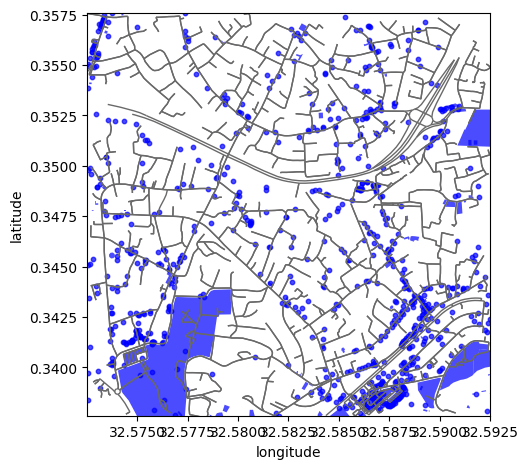

In [15]:
fig, ax = plt.subplots()

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([west, east])
ax.set_ylim([south, north])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot all POIs
pois.plot(ax=ax, color="blue", alpha=0.7, markersize=10)
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


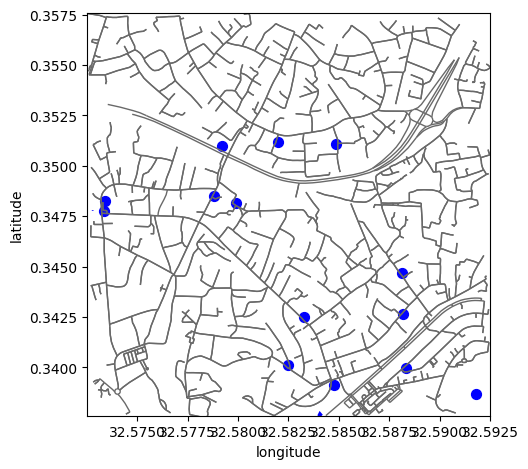

In [16]:
# Plot a subset of the POIs (e.g., tourist places)
# Create figure
fig, ax = plt.subplots()

# Plot the footprint
area.plot(ax=ax, facecolor="white")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

ax.set_xlim([west, east])
ax.set_ylim([south, north])
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

# Plot tourist places
tourist_places = pois[pois.tourism.notnull()]
tourist_places.plot(ax=ax, color="blue", alpha=1, markersize=50)
plt.tight_layout()

We have the POI information on all tourist places structured in a
geodataframe. To work with them in a machine learning algorithm, it will
be easier to convert them to a pandas DataFrame.

In [17]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
pois_df = pd.DataFrame(pois)
pois_df['latitude'] = pois_df.apply(lambda row: row.geometry.centroid.y, axis=1)
pois_df['longitude'] = pois_df.apply(lambda row: row.geometry.centroid.x, axis=1)

tourist_places_df = pois_df[pois_df.tourism.notnull()]
print(len(tourist_places_df))
tourist_places_df

16


addr:housenumber           addr:street  \
element_type osmid                                               
node         3032234586              NaN                   NaN   
             4119308804              NaN                   NaN   
             4942954054              NaN                   NaN   
             5678162422              NaN                   NaN   
             7743212629              NaN                   NaN   
             8445011017              NaN      Kisingiri Street   
             8456545033              NaN          Mawanda Road   
             8456545129              NaN          Mawanda Road   
             8481722617              NaN                   NaN   
             8498971118              NaN                   NaN   
             8597526517              NaN                   NaN   
             8686698118              NaN          Oketcho Road   
             8686698119              NaN           Kasubi Road   
             8778105111          8HQJ+XW  New Mulago Gate Road   
way          437577068           Plot 72            Kiira Road   
             649469461               NaN                   NaN   

                                    amenity cuisine  \
element_type osmid                                    
node         3032234586                 NaN     NaN   
             4119308804  mobile_money_agent     NaN   
             4942954054                 NaN     NaN   
             5678162422                 NaN     NaN   
             7743212629                 NaN     NaN   
             8445011017                 NaN     NaN   
             8456545033                 NaN     NaN   
             8456545129                 NaN     NaN   
             8481722617                 NaN     NaN   
             8498971118                 NaN     NaN   
             8597526517                 NaN     NaN   
             8686698118                 NaN     NaN   
             8686698119                 NaN     NaN   
             8778105111                 NaN     NaN   
way          437577068                  NaN     NaN   
             649469461                  NaN     NaN   

                                              name            phone  \
element_type osmid                                                    
node         3032234586                    Fat Cat  +256 771 393892   
             4119308804                Green apple              NaN   
             4942954054                Okrut Close              NaN   
             5678162422          Tagore Apartments              NaN   
             7743212629                        NaN              NaN   
             8445011017               Prisma Hotel       0414371122   
             8456545033          Silverline Condos              NaN   
             8456545129            Kida Guesthouse              NaN   
             8481722617           Koda Guest House              NaN   
             8498971118         Mulago Guest House              NaN   
             8597526517           Papa Guest house              NaN   
             8686698118          Silent Corner inn              NaN   
             8686698119           Kerona Dam Hotel              NaN   
             8778105111                 Nyumba 591    +256792172017   
way          437577068   Hilton Garden Inn Kampala  +256 31 3800800   
             649469461    Ku spot inn accomodation              NaN   

                                                                   website  \
element_type osmid                                                           
node         3032234586                      http://www.fatcatkampala.com/   
             4119308804                                                NaN   
             4942954054                                                NaN   
             5678162422                                                NaN   
             7743212629                                                NaN   
             844501

In [19]:
poi_counts = {}

poi_types =["amenity", "historic", "leisure", "shop", "tourism", "religion", "memorial"]

for tag in poi_types:
  if tag in pois_df.columns:
    poi_counts[tag] = pois_df[tag].notnull().sum()
  else:
    poi_counts[tag] = 0

poi_counts_df = pd.DataFrame(list(poi_counts.items()), columns=['POI Type', 'Count'])


poi_counts_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,POI Type,Count
0,amenity,729
1,historic,0
2,leisure,20
3,shop,163
4,tourism,16
5,religion,7
6,memorial,0


## Assessing the Available OpenStreetMap Features

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/assessing-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/assessing-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the course assessment you will be given the task of constructing a
prediction system for various indicators at a given location. We expect
that knowledge of the local region around the property should be helpful
in making those predictions. To evaluate this we will now look at
[OpenStreetMap](https://www.openstreetmap.org) as a data source.

In this section, you should follow the methodology used in the above
example to extract summary OSM information that can be useful in making
predictions about an area. Use code from the example to construct a
function that summarises the number of various points of interest in a
target area. You should write reusable code that allows you to explore
the characteristics of different points of interest.

In [20]:
def count_pois_near_coordinates(latitude: float, longitude: float, tags: dict, distance_km: float = 1.0) -> dict:
    """
    Count Points of Interest (POIs) near a given pair of coordinates within a specified distance.
    Args:
        latitude (float): Latitude of the location.
        longitude (float): Longitude of the location.
        tags (dict): A dictionary of OSM tags to filter the POIs (e.g., {'amenity': True, 'tourism': True}).
        distance_km (float): The distance around the location in kilometers. Default is 1 km.
    Returns:
        dict: A dictionary where keys are the OSM tags and values are the counts of POIs for each tag.
    """
    box_width = distance_km / 111
    box_height = distance_km / 111
    north = latitude + box_height/2
    south = latitude - box_width/2
    west = longitude - box_width/2
    east = longitude + box_width/2

    pois = ox.geometries_from_bbox(north, south, east, west, tags)

    poi_counts = {}
    for tag, value in tags.items():
        if isinstance(value, list):
            # Count entries that match any value in the list for this tag
            poi_counts[tag] = pois[pois[tag].isin(value)].shape[0]
        elif value is True:
            # Count any non-null entries for this tag if 'True' was specified
            poi_counts[tag] = pois[tag].notnull().sum()
        else:
            # Count entries that exactly match the specified value for this tag
            poi_counts[tag] = (pois[tag] == value).sum()

    return poi_counts


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now that you have written reusable code, choose the tags you want to
query. This should be different from the tags used in the example. You
can also search for specific tags like this:
`"amenity": ["university", ...`.

In [22]:
# Modify this dict
tags = {
    "amenity": ["university", "police"],
    "building": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
}

Here there are 13 UK locations.

In [23]:
locations_dict = {
    "Cambridge": (52.2054, 0.1132),
    "Oxford": (51.7570, -1.2545),
    "Euston Square": (51.5246, -0.1340),
    "Temple": (51.5115, -0.1160),
    "Kensington": (51.4988, -0.1749),
    "Barnsley": (53.5526, -1.4797),
    "Mansfield": (53.1472, -1.1987),
    "Wakefield": (53.6848, -1.5039),
    "Sunderland": (54.9069, -1.3838),
    "Rotherham": (53.4300, -1.3568),
    "Doncaster": (53.5228, -1.1288),
    "Chesterfield": (53.2350, -1.4210),
    "Huddersfield": (53.6450, -1.7794)
    }

### Exercise 1

Use your code to query the OSM feature counts for each of them, and
combine them into one dataframe.

### Exercise 1 Answer

Write your answer to Exercise 1 here

In [24]:
results = []
for location_name, (latitude, longitude) in locations_dict.items():
  counts = count_pois_near_coordinates(latitude, longitude, tags)
  # add the location name so we can see it easier
  counts['location'] = location_name
  results.append(counts)
pois_df = pd.DataFrame(results)
print(pois_df)

<ipython-input-20-c8e20191a360>:19: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_bbox(north, south, east, west, tags)
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:48: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  return features.features_from_bbox(north, south, east, west, tags=tags)
/usr/local/lib/python3.10/dist-packages/osmnx/geometries.py:48: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, ri

    amenity  building  leisure  shop  tourism  religion       location
0        21       282       61     8       16        11      Cambridge
1        26       641       84   101       48        22         Oxford
2        36       626       38    80       43         6  Euston Square
3         3       295       23    36       47         5         Temple
4         3       472       45    19       43         4     Kensington
5         0       474       22   225        8         4       Barnsley
6         0       411       10   219        4        10      Mansfield
7         1       492       16    89        7        10      Wakefield
8         1       233       15   215       12         2     Sunderland
9         1       380       25   140        3         2      Rotherham
10        1       234        3    61        9         6      Doncaster
11        1       368        8    43        7         2   Chesterfield
12        1       333        8   219        5         3   Huddersfield


### Exercise 2

Use k-means clustering or another clustering method to try to find
clusters of similar areas, based on nearby OSM features.

### Exercise 2 Answer

Write your answer to Exercise 2 here

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

location_names = pois_df.pop("location")

# standardization
scaler = StandardScaler()
pois_scaled = scaler.fit_transform(pois_df)

# Apply k-means algorithm
kmeans = KMeans(n_clusters=3, random_state=0)
pois_df['cluster'] = kmeans.fit_predict(pois_scaled)

pois_df['location'] = location_names
print(pois_df[['location','cluster']])

         location  cluster
0       Cambridge        1
1          Oxford        2
2   Euston Square        2
3          Temple        1
4      Kensington        1
5        Barnsley        0
6       Mansfield        0
7       Wakefield        0
8      Sunderland        0
9       Rotherham        0
10      Doncaster        0
11   Chesterfield        0
12   Huddersfield        0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

### Exercise 3

Investigate the locations yourself, and assign them categories based on
your interpretation. Visualise and compare your manual assignments
against your clustering results.

### Exercise 3 Answer

Write your answer to Exercise 3 here

According to my investigation, Cambridge and Oxford both are renowned for their historic universities and academic institures. They have many `amenity` features related to universities, `tourism` due to historic sites, and `leisure` options for students and tourists.

Euston Square, Temple, and Kensington are all prominent areas within London with high desities of buildings, shops and tourism.

Barnsley, Mansfield, Wakefield, Sunderland, Rotherham, Doncaster, Chesterfield, and Huddersfield are generally smaller regional cities and town in the UK, primarily residential and with lower densities of POIs related to tourism, leisure and universities.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

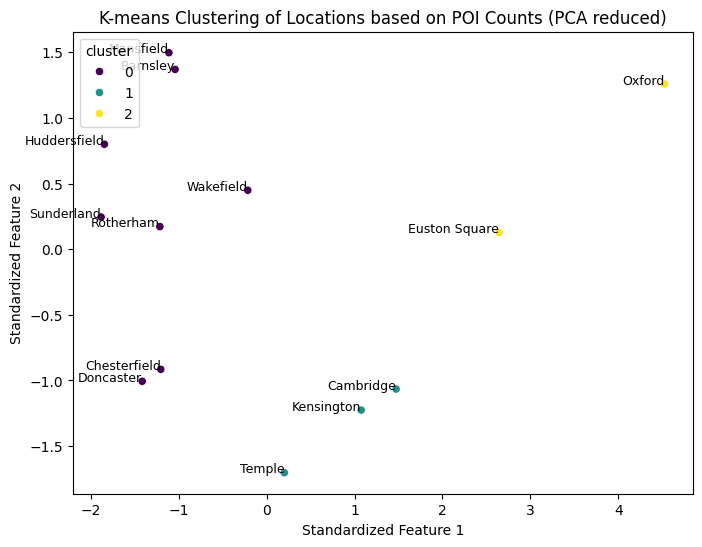

In [26]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Using Principal component analysis for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pois_pca = pca.fit_transform(pois_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pois_pca[:, 0], y=pois_pca[:, 1], hue=pois_df['cluster'], palette="viridis")
plt.title("K-means Clustering of Locations based on POI Counts (PCA reduced)")
plt.xlabel("Standardized Feature 1")
plt.ylabel("Standardized Feature 2")

for i, city in enumerate(location_names):
    plt.text(pois_pca[i, 0], pois_pca[i, 1], city, fontsize=9, ha='right')

plt.show()

Comparing to the data and visualisation we know that Cambridge and Oxford are not that similar. Euston Square is actually with a closer distance with Oxford than all the others and Cambrdige catergorises closely to Temple and Kensington. All the others are within expectation.

### Exercise 4

Normalise your dataframe and compute a distance matrix for the
locations. Visualise it, and compare the outcode with your previous
clustering results.

### Exercise 4 Answer

Write your answer to Exercise 4 here

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


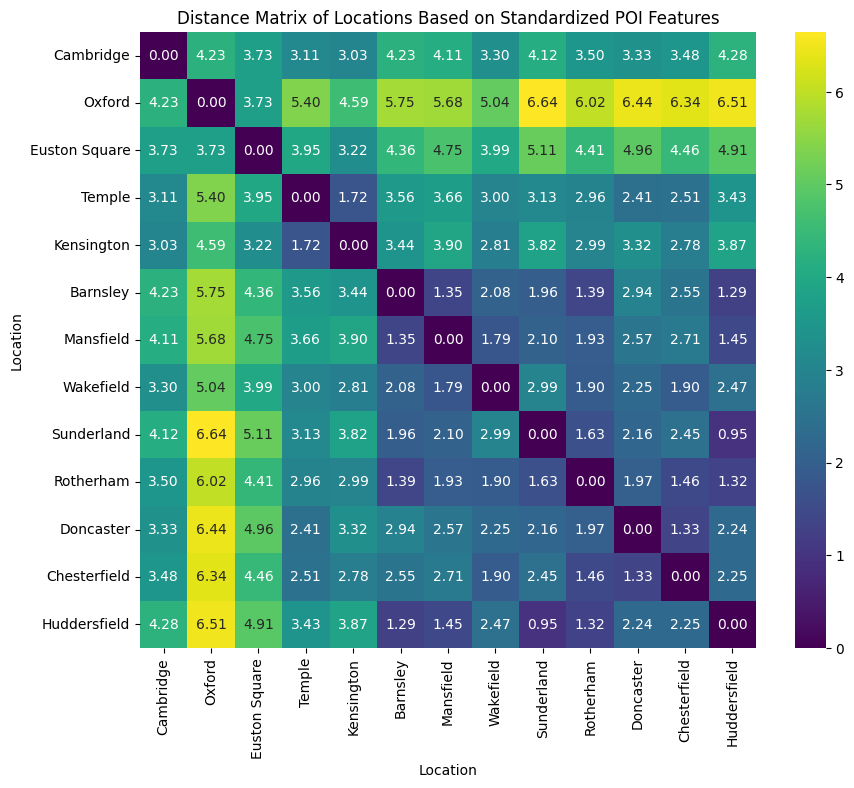

In [27]:
from scipy.spatial.distance import pdist, squareform

features_df = pois_df.drop(columns=["location", "cluster"])

# Normalize the data using StandardScaler
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(features_df),
                             columns=features_df.columns,
                             index=pois_df['location'])

# Euclidean distance
distance_matrix = pd.DataFrame(squareform(pdist(normalized_df, metric='euclidean')),
                               index=normalized_df.index,
                               columns=normalized_df.index)

plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap="viridis", annot=True, fmt=".2f", square=True)
plt.title("Distance Matrix of Locations Based on Standardized POI Features")
plt.xlabel("Location")
plt.ylabel("Location")
plt.show()

Some observations:


*   The cloest cities to Cambrdige is Kinsington, Temple. It is actually quite far from Oxford
*   Oxford is quite far from all other cites except for Euston Square
*   Barnsley, Mansfield, Wakefield, Sunderland, Rotherham, Doncaster, Chesterfield, Huddersfield is closely clustered together



### Exercise 5

Which features you included were correlated among each other?
Investigate and plot a feature correlation matrix. What do these results
say about your feature selection?

### Exercise 5 Answer

Write your answer to Exercise 5 here

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


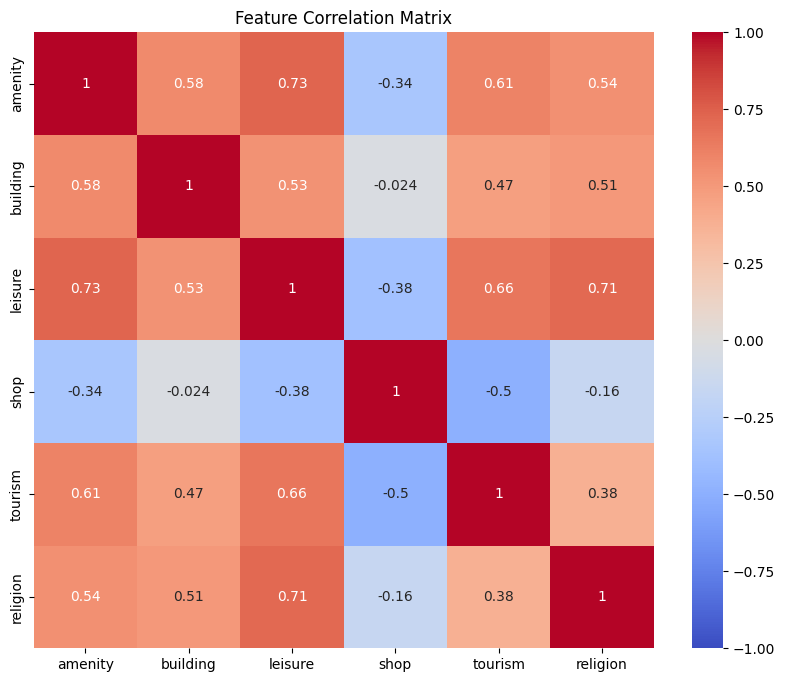

In [28]:
features_df = pois_df.drop(columns=["location", "cluster"])

# Calculate the correlation matrix
correlation_matrix = features_df.corr()

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()




*   The high correlation between `amenity`, `leisure`, and `tourism` indicates some redundancy. Including all these features might not add substantial new information, as they often co-occur.
*   `Shop` appears to be distinct from other features, as it has negative or weak correlations with most other features. This suggests that it provides unique information.



## Joining Spatial Data

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_access/includes/spatial-join.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_access/includes/spatial-join.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

### Matching OpenStreetMap and House Prices data

In this exercise you will download the geographies of houses from
OpenStreetMap and map them to visualise the records you see in the house
price dataset. This is a data linking and validation exercise.

The latitude and longitude of Cambridge are as follows:

In [29]:
place_name = "Cambridge"
latitude = 52.1951
longitude = 0.1313

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We want to execute an SQL query on your database to select all houses in
a 1km x 1km region around the centre of Cambridge that have been part of
housing transactions since 2020.

This operation can take a very long time. This is because the table is
not indexed on coordinate data, and therefore the query has to check
tens of millions of rows. This can be fixed by constructing an index on
the `latitude` and `longitude` values, using `BTREE` to make a joint
index. *Note that indexing can take a long time.* Consider also indexing
your table by other variables you might find useful later.

### Exercise 6

Index the table on the coordinate data using a `BTREE` and index other
columns you might find useful.

### Exercise 6 Answer

Write your answer to Exercise 6 here

In [30]:
# Use this box for any code you need



### Exercise 7

Write an SQL query on your database to select all houses in a 1km x 1km
region around the centre of Cambridge that have been part of housing
transactions since 2020.

### Exercise 7 Answer

Write your answer to Exercise 7 here

In [31]:
# Use this box for any code you need



### Exercise 8

Get information about all the buildings in that area from OpenStreetMaps
(`'building': True`). You will need their address information
(`addr:housenumber`, `addr:street`, `addr:postcode`, …) and geometry
polygon (`geometries_from_bbox`). Construct a dataframe that lists all
OSM buildings in the area that have a full address, along with their
area (in square meters). Plot a map of the area, using color to mark the
buildings with addresses and the ones without.

### Exercise 8 Answer

Write your answer to Exercise 8 here

In [32]:
# Use this box for any code you need



### Exercise 9

Match the houses you found in the price paid dataset with the buildings
on OpenStreetMaps based on their addresses. Can this be applied to all
building types? Are there any PP transactions which you couldn’t match
to an OSM building, or any OSM buildings you coulnd’t match to a PP
transaction? If so, what could be the reason for this? Do you employ any
techniques to find non-exact matches? If yes, what matches would you
have missed without it? Are you encountering false positive matches? Use
this address matching to merge the two dataframes.

### Exercise 9 Answer

Write your answer to Exercise 9 here

In [33]:
# Use this box for any code you need



### Exercise 10

Examine the relationship between the price and area of a property. -
What other variables do you need to account for? - Is the correlation as
strong as you would expect? - What factors could be impacting this?

Visualise the relationships you found.

### Exercise 10 Answer

Write your answer to Exercise 10 here

In [34]:
# Use this box for any code you need



Demonstrate the reusability of your code by executing the same analysis
for Oxford.

In [35]:
place_name = "Oxford"

latitude = 51.7520
longitude = -1.2577

### Exercise 11

Replicating the same analysis for Oxford. You do not need to answer all
the questions again, but you should show that your code works for this
new input without the need to modify it. You should use the Fynesse
library for this. Finish by plotting a map of the area and the
correlation you find.

### Exercise 11 Answer

Write your answer to Exercise 11 here

In [36]:
# Use this box for any code you need



## Conclusions

You should find some of the code you wrote above useful in your final
assessment. Make sure you wrote the code to be reusable and efficient,
and do include it in your Fynesse library. The functions you are
particularly likely to reuse are the OSM feature search, and map
visualisation functions.

### Exercise 12

Add relevant code to your Fynesse library. Demonstrate this was
successful by installing your library below and calling at least two
example functions.

### Exercise 12 Answer

Write your answer to Exercise 12 here

In [37]:
# Use this box for any code you need



## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References